# **Slide 1**. 
Name, Surname, Student ID: Include your personal information on this slide.

# **Slide 2**. 
Download the following series from FRED and describe them:
- NA000334Q
- GDPDEF
- B230RC0Q173SBEA

In [380]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fredapi import Fred
import seaborn as sns

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 40)
pd.set_option("display.precision", 2)

In [381]:
fred_key = '17193bb5d3d0af2508e249e344961fcf'
fred = Fred(api_key=fred_key)

In [382]:
def get_fred_data(code):
    return fred.get_series(code, frequency = 'q')

fred_codes = {'GDP' : 'NA000334Q',
              'Defl' : 'GDPDEF',
              'Pop' : 'B230RC0Q173SBEA'}

df = pd.DataFrame()

for var in fred_codes.keys():
    df[var] = get_fred_data(fred_codes[var])

In [383]:
df['Time'] = df.index
df.reset_index(drop = True, inplace=True)

In [384]:
df.head()

,GDP,Defl,Pop,Time
0,58497.0,11.14,143143.0,1947-01-01
1,60672.0,11.30,143790.0,1947-04-01
2,62196.0,11.49,144449.0,1947-07-01
3,68250.0,11.77,145122.0,1947-10-01
4,64258.0,11.87,145709.0,1948-01-01


### a) Have a brief sight to the data

(0.0, 6802375.0)

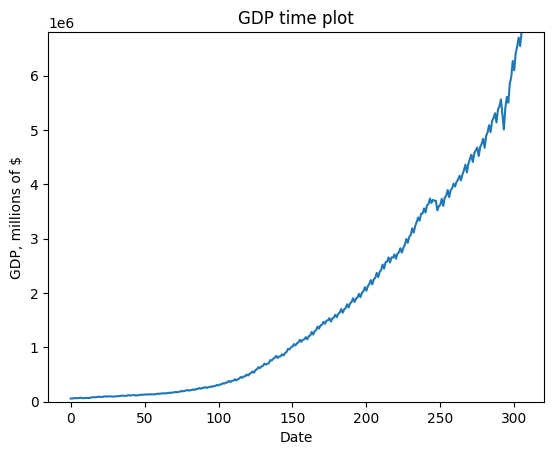

In [385]:
# plot the GDP series
gdp_max = df['GDP'].max()

plt.plot(df.index, df.GDP)
plt.title("GDP time plot")
plt.xlabel("Date")
plt.ylabel("GDP, millions of $")
plt.ylim(0, gdp_max)

Text(0, 0.5, 'Deflator')

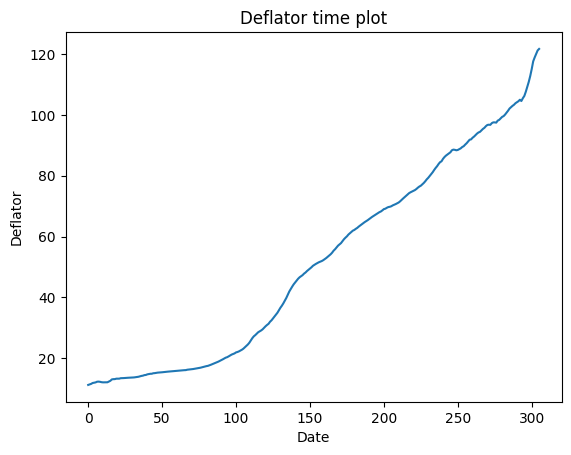

In [386]:
# plot the Defl series
plt.plot(df.index, df.Defl)
plt.title("Deflator time plot")
plt.xlabel("Date")
plt.ylabel("Deflator")

Text(0, 0.5, 'Population, thousands')

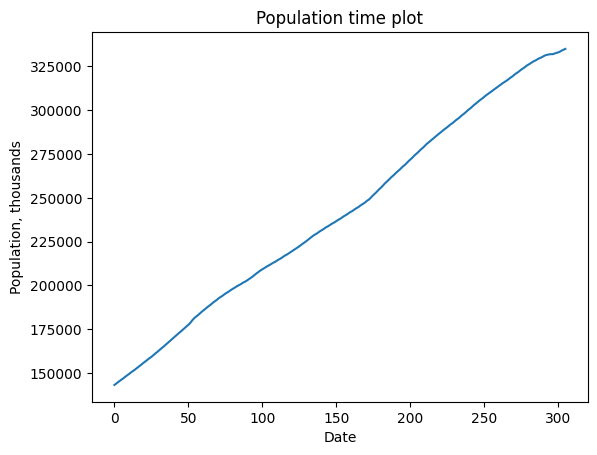

In [387]:
# plot the Defl series
plt.plot(df.index, df.Pop)
plt.title("Population time plot")
plt.xlabel("Date")
plt.ylabel("Population, thousands")

### b) Detect seasonality 

In [388]:
# ensure it is in date time format
df['Time'] = pd.to_datetime(df['Time'])

# extract Year and Quarter
df['Year'] = df['Time'].dt.year.shift(1)
df['Quarter'] = df['Time'].dt.quarter.shift(1)

df['Year'].fillna(1947, inplace=True)
df['Quarter'].fillna(4, inplace=True)

df['Year'] = df['Year'].astype(int)
df['Quarter'] = df['Quarter'].astype(int)

df.tail()

,GDP,Defl,Pop,Time,Year,Quarter
301,6.41e+06,117.67,333321.0,2022-04-01,2022,1
302,6.54e+06,118.96,333799.0,2022-07-01,2022,2
303,6.70e+06,120.09,334282.0,2022-10-01,2022,3
304,6.55e+06,121.26,334641.0,2023-01-01,2022,4
305,6.80e+06,121.77,335019.0,2023-04-01,2023,1


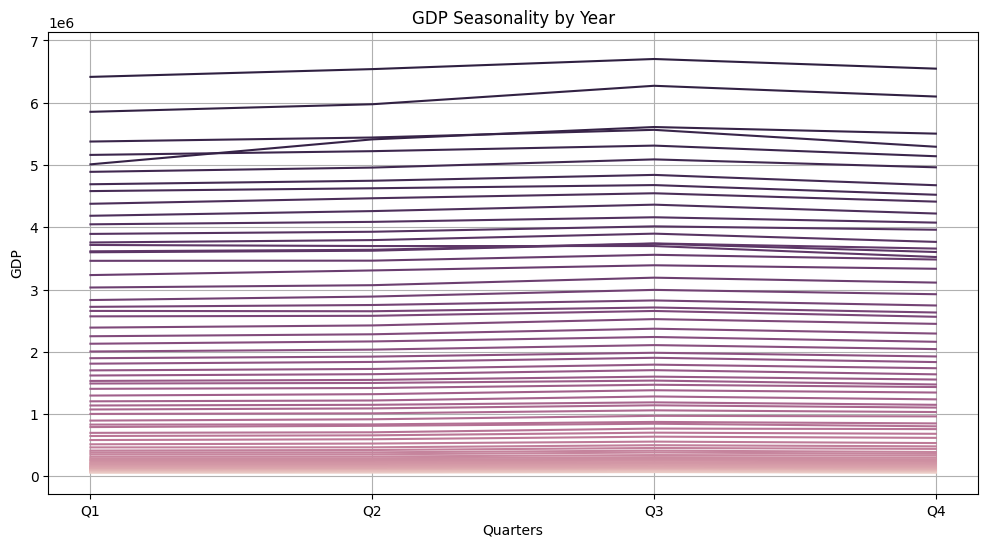

In [389]:
plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=df, x='Quarter', y='GDP', hue='Year', legend=False)

plt.title('GDP Seasonality by Year')
plt.xlabel('Quarters')
plt.ylabel('GDP')
# plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

# Set custom tick labels on the x-axis
ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels(['Q1', 'Q2', 'Q3', 'Q4'])

plt.show()

### **Comment:**

- all the series span from the 1947Q4 to 2023Q1. This means each series contains 306 observations (quarters).

- Series **GDP** shows an increasing trend, as well as some cycles. In fact there are cycles of expansion and decline. The data are in millions of dollars. Two significant troughs are visible: the one in 2008 and the one in 2020. One huge increase is visible after 2020, and considering it's nominal data, this may be due to inflation. In fact, deflator increased in the same time period.

- Series **Pop** shows an increasing trend. It doesn't seem to show cycles or seasonality. Moreover, the pattern is smooth and linear. The data are in thousands.

- series **Defl** is increasing, even though not linearly. We can spot a signifiant increase after 2020, probably as a consequence of inflation. Base year is 2012=100

# **Slide 3**
Focus on the sample from 1970 to 2022
- Compute real gross domestic product in per capita terms and plot it.
- Describe in one line the main patterns visible in the plot.

In [390]:
# check that Time is a datetime class
df.dtypes

# limit the span of the observations as requested
filtered_df = df.query(" Time >= '1970-04-01' and Time <= '2023-01-01'")

filtered_df.head()

,GDP,Defl,Pop,Time,Year,Quarter
93,268532.0,20.11,204721.0,1970-04-01,1970,1
94,268019.0,20.27,205419.0,1970-07-01,1970,2
95,282764.0,20.54,206130.0,1970-10-01,1970,3
96,273782.0,20.85,206763.0,1971-01-01,1970,4
97,291216.0,21.13,207362.0,1971-04-01,1971,1


In [391]:
# compute real GDP
filtered_df['Real_GDP'] = (filtered_df['GDP']/filtered_df['Defl'])*100

# compute real GDP per capita
filtered_df['RGDP_capita'] = (filtered_df['Real_GDP']*1e6)/(filtered_df['Pop']*1e3)

filtered_df.head()

C:\Users\giord\AppData\Local\Temp\ipykernel_18796\1976194898.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Real_GDP'] = (filtered_df['GDP']/filtered_df['Defl'])*100
C:\Users\giord\AppData\Local\Temp\ipykernel_18796\1976194898.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['RGDP_capita'] = (filtered_df['Real_GDP']*1e6)/(filtered_df['Pop']*1e3)


,GDP,Defl,Pop,Time,Year,Quarter,Real_GDP,RGDP_capita
93,268532.0,20.11,204721.0,1970-04-01,1970,1,1.34e+06,6523.26
94,268019.0,20.27,205419.0,1970-07-01,1970,2,1.32e+06,6435.87
95,282764.0,20.54,206130.0,1970-10-01,1970,3,1.38e+06,6678.23
96,273782.0,20.85,206763.0,1971-01-01,1970,4,1.31e+06,6349.85
97,291216.0,21.13,207362.0,1971-04-01,1971,1,1.38e+06,6647.35


**`Strange values for 2022: only 15k as gdp per capita!!!!!`**

Text(0, 0.5, 'Time')

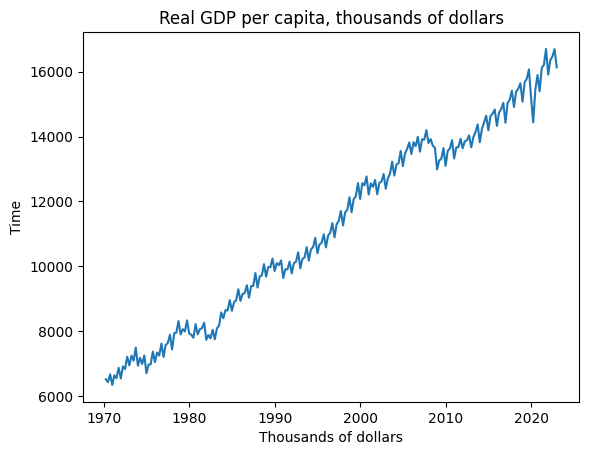

In [392]:
plt.plot(filtered_df.Time, filtered_df.RGDP_capita)
plt.title('Real GDP per capita, thousands of dollars')
plt.xlabel('Thousands of dollars')
plt.ylabel('Time')

**Comment**:
- visible long term increasing trend, 
- as well as cycles that last 5 years, 10 years sometimes. For instance, 1992-2003 roughly it's an expansion, while 2007-2009 is negative cycle
- seasonality

Try to do the same seasnoality stuff performed before.

C:\Users\giord\AppData\Local\Temp\ipykernel_18796\1155767350.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Year'] = filtered_df['Time'].dt.year
C:\Users\giord\AppData\Local\Temp\ipykernel_18796\1155767350.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Quarter'] = filtered_df['Time'].dt.quarter


[Text(1, 0, 'Q1'), Text(2, 0, 'Q2'), Text(3, 0, 'Q3'), Text(4, 0, 'Q4')]

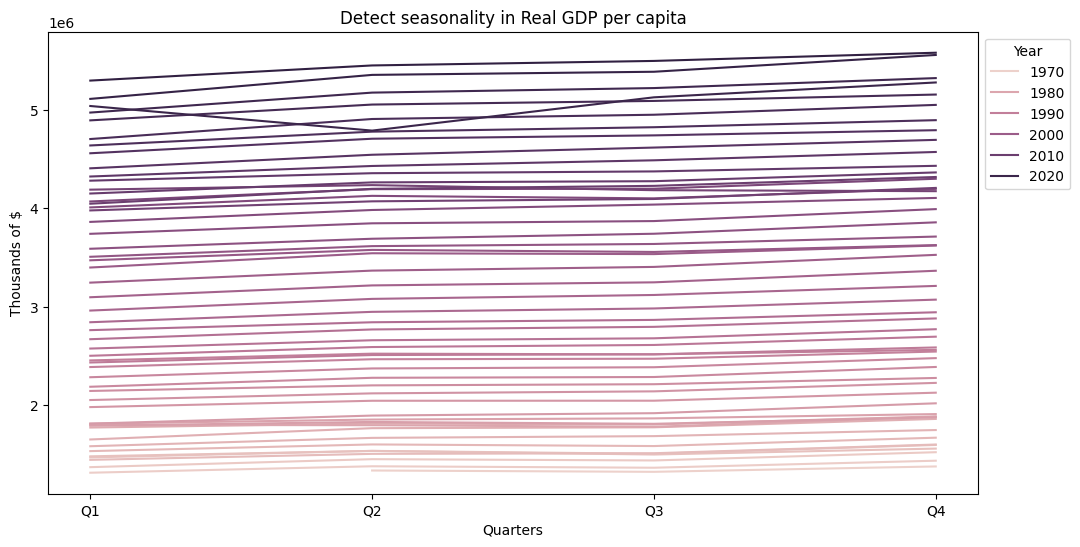

In [393]:
# extract year and quarter
filtered_df['Year'] = filtered_df['Time'].dt.year
filtered_df['Quarter'] = filtered_df['Time'].dt.quarter

plt.figure(figsize=(12,6))

ax = sns.lineplot(data = filtered_df, x = 'Quarter', y = 'Real_GDP', hue= 'Year', legend = 'brief')
plt.title('Detect seasonality in Real GDP per capita')
plt.xlabel('Quarters')
plt.ylabel('Thousands of $')
plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1, 1))

ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels(['Q1', 'Q2', 'Q3', 'Q4'])

# **Slide 4.** 
What is the sample average of (annualized) per capita GDP growth (rgdppct)? Use the following 
formula:

$$ 
\Delta \text{rgdp-capita}_{t} = 400 \times \log \left (\frac{\text{rgdp-capita}_{t}}{\text{rgdp-capita}_{t-1}}\right)
$$

In [394]:
# apply the formula
filtered_df['Delta'] = 400*np.log(filtered_df['RGDP_capita'] / filtered_df['RGDP_capita'].shift(1))

# replace the null value with zero
filtered_df['Delta'].fillna(0, inplace=True)

# make order within years and quarters
filtered_df['Year'] = filtered_df['Year'].shift(1)
filtered_df['Quarter'] = filtered_df['Quarter'].shift(1)

# fill the null value with its right year and time
filtered_df['Year'].fillna(1970, inplace=True)
filtered_df['Quarter'].fillna(1, inplace=True)

# convert to int the year and quarter
filtered_df['Year'] = filtered_df['Year'].astype(int)
filtered_df['Quarter'] = filtered_df['Quarter'].astype(int)

# compute the average, as requested
mean_per_capita_growth = np.mean(filtered_df['Delta'])
print(mean_per_capita_growth)

1.7084937420825637


C:\Users\giord\AppData\Local\Temp\ipykernel_18796\4071359615.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Delta'] = 400*np.log(filtered_df['RGDP_capita'] / filtered_df['RGDP_capita'].shift(1))
C:\Users\giord\AppData\Local\Temp\ipykernel_18796\4071359615.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Delta'].fillna(0, inplace=True)
C:\Users\giord\AppData\Local\Temp\ipykernel_18796\4071359615.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [426]:
filtered_df.head()

,GDP,Defl,Pop,Time,Year,Quarter,Real_GDP,RGDP_capita,Delta,Log
93,268532.0,20.11,204721.0,1970-04-01,1970,1,1.34e+06,6523.26,0.00,8.78
94,268019.0,20.27,205419.0,1970-07-01,1970,2,1.32e+06,6435.87,-5.40,8.77
95,282764.0,20.54,206130.0,1970-10-01,1970,3,1.38e+06,6678.23,14.79,8.81
96,273782.0,20.85,206763.0,1971-01-01,1970,4,1.31e+06,6349.85,-20.17,8.76
97,291216.0,21.13,207362.0,1971-04-01,1971,1,1.38e+06,6647.35,18.31,8.80


In [396]:
filtered_df.dtypes

GDP                   float64
Defl                  float64
Pop                   float64
Time           datetime64[ns]
Year                    int32
Quarter                 int32
Real_GDP              float64
RGDP_capita           float64
Delta                 float64
dtype: object

Raise concern about accuracy...

In [397]:
print((6435.87-6523.26)/6523.26)

print(400*np.log(6435.87/6523.26))

-0.013396675895181294
-5.394888374147534


# **Slide 5**. 
Plot the sample autocorrelation **`sample`** of ∆𝑟𝑔𝑑𝑝𝑝𝑐(𝑡) and log(𝑟𝑔𝑑𝑝𝑝𝑐(𝑡)).

In [398]:
# we already have the Delta, create the log
filtered_df['Log'] = np.log(filtered_df['RGDP_capita'])

C:\Users\giord\AppData\Local\Temp\ipykernel_18796\1406537084.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Log'] = np.log(filtered_df['RGDP_capita'])


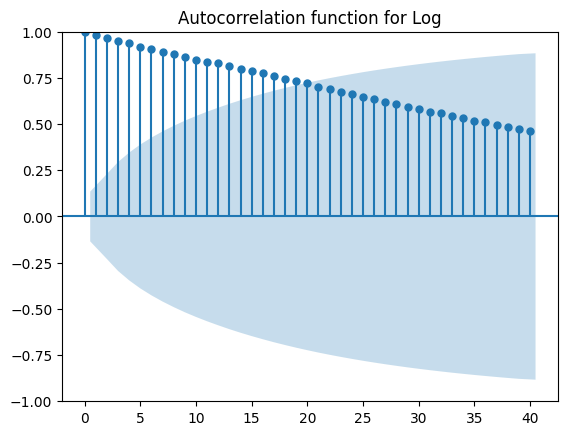

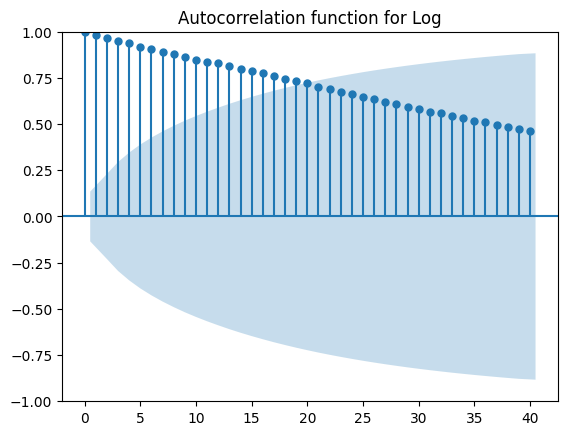

In [399]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(filtered_df['Log'], lags=40, title="Autocorrelation function for Log")

 if an autocorrelation value falls within this shaded area, it suggests that the value is not statistically significantly different from zero at the 95% confidence level.

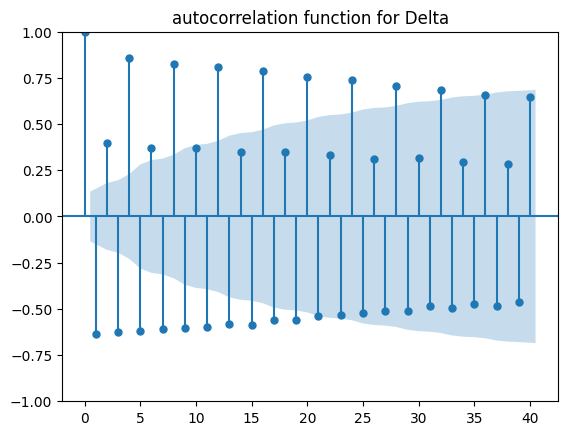

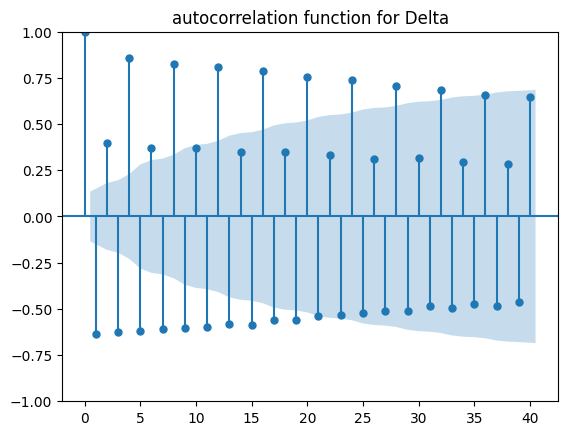

In [400]:
plot_acf(filtered_df['Delta'], lags=40, title="autocorrelation function for Delta")

# **Slide 6.** 
Use data from 1970 to 2019 (last quarter) to estimate a Random Walk with Drift and a Seasonal Random Walk with Drift model for log(𝑟𝑔𝑑𝑝𝑝𝑐𝑡
). Forecast 2020 (quarter 1)-2022 (quarter 4).

- Plot 𝑟𝑔𝑑𝑝𝑝𝑐𝑡 and the two forecasts for 𝑟𝑔𝑑𝑝𝑝𝑐𝑡 (you need to transform the log forecast).

In [420]:
# limit the span of the observations as requested
filtered_df2 = filtered_df.query(" Time >= '1970-04-01' and Time <= '2020-01-01'")

filtered_df2.tail()

,GDP,Defl,Pop,Time,Year,Quarter,Real_GDP,RGDP_capita,Delta,Log
288,5.14e+06,103.38,329868.0,2019-01-01,2018,4,4.97e+06,15073.42,-14.88,9.62
289,5.38e+06,103.89,330245.0,2019-04-01,2019,1,5.17e+06,15670.14,15.53,9.66
290,5.44e+06,104.21,330729.0,2019-07-01,2019,2,5.22e+06,15786.81,2.97,9.67
291,5.56e+06,104.54,331208.0,2019-10-01,2019,3,5.32e+06,16069.80,7.11,9.68
292,5.29e+06,105.04,331534.0,2020-01-01,2019,4,5.04e+06,15198.77,-22.29,9.63


C:\Users\giord\AppData\Local\Temp\ipykernel_18796\291499447.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df2['RandomWalk'] = random_walk


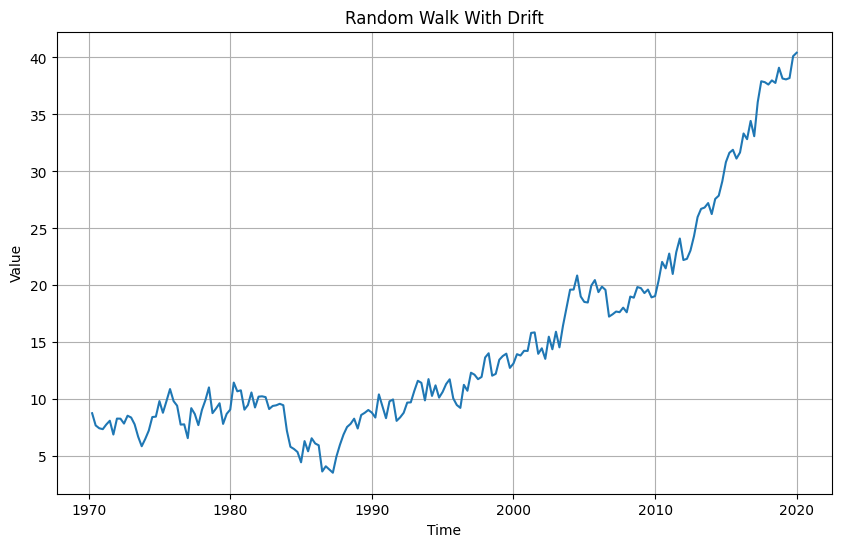

In [424]:
# how many quarters do we have?
start_year = 1970
end_year = 2019
quarters_per_year = 4

# parameters of the random walk
a = 0.1
n = (end_year - start_year + 1)*4

# generate the model
random_walk = np.zeros(n)
random_walk[0] = filtered_df2['Log'].iloc[0]

for t in range(1,n):
    random_walk[t] = a + random_walk[t-1] + np.random.normal(0,1)

# add the random walk as a new column in your DataFrame if needed
filtered_df2['RandomWalk'] = random_walk

# plot the model
plt.figure(figsize=(10,6))
plt.plot(filtered_df2['Time'], random_walk)
plt.title("Random Walk With Drift")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.show()

In [423]:
filtered_df2.head()

,GDP,Defl,Pop,Time,Year,Quarter,Real_GDP,RGDP_capita,Delta,Log,RandomWalk
93,268532.0,20.11,204721.0,1970-04-01,1970,1,1.34e+06,6523.26,0.00,8.78,8.78
94,268019.0,20.27,205419.0,1970-07-01,1970,2,1.32e+06,6435.87,-5.40,8.77,9.64
95,282764.0,20.54,206130.0,1970-10-01,1970,3,1.38e+06,6678.23,14.79,8.81,9.01
96,273782.0,20.85,206763.0,1971-01-01,1970,4,1.31e+06,6349.85,-20.17,8.76,9.50
97,291216.0,21.13,207362.0,1971-04-01,1971,1,1.38e+06,6647.35,18.31,8.80,12.03


In [433]:
# create a new data frame to use random walk data to make predictions
random_walk_df = pd.concat([
    filtered_df['Time'], filtered_df['Year'], filtered_df['Quarter'],
    filtered_df['Real_GDP'], filtered_df['RGDP_capita'], filtered_df['Delta'],
    filtered_df['Log'], filtered_df2['RandomWalk']
], axis = 1)

random_walk_df.tail()

,Time,Year,Quarter,Real_GDP,RGDP_capita,Delta,Log,RandomWalk
300,2022-01-01,2021,4,5.30e+06,15908.50,-19.42,9.67,NaN
301,2022-04-01,2022,1,5.45e+06,16353.66,11.04,9.70,NaN
302,2022-07-01,2022,2,5.50e+06,16467.69,2.78,9.71,NaN
303,2022-10-01,2022,3,5.58e+06,16693.31,5.44,9.72,NaN
304,2023-01-01,2022,4,5.40e+06,16133.15,-13.65,9.69,NaN
